## Requirements and Setup

In [1]:
! pip install cirq

     |████████████████████████████████| 48 kB 469 kB/s eta 0:00:011
     |████████████████████████████████| 56 kB 532 kB/s  eta 0:00:01
     |████████████████████████████████| 541 kB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 593 kB 11.4 MB/s eta 0:00:01
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     |████████████████████████████████| 13.7 MB 12.2 MB/s eta 0:00:01
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
     |████████████████████████████████| 97 kB 400 kB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 441 kB/s  eta 0:00:01
     |████████████████████████████████| 220 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 254 kB/s  eta 0:00:01
     |████████████████████████████████| 52 kB 147 kB/s  eta 0:00:01
     |████████████████████████████████| 44 kB 245 kB/s  eta 0:00:01
     |████████████████████████████████| 229 kB 11.6 MB/s eta 0:00:01


     |████████████████████████████████| 16.8 MB 3.3 MB/s eta 0:00:011
     |████████████████████████████████| 119 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 570 kB 3.9 MB/s eta 0:00:01
  Created wheel for lark: filename=lark-0.11.3-py2.py3-none-any.whl size=99648 sha256=40afe458c483d220aa3f3d57c33a6f00efff2771cf7f71934f91f0b81fe8464d
  Stored in directory: /home/pratzz/.cache/pip/wheels/34/cb/6c/4df359c2a3f0a1af4cccae6392bee423bb5aff530103de3538
  Created wheel for rpcq: filename=rpcq-3.10.0-py3-none-any.whl size=45969 sha256=5528b22da23693b06241058bc09b3d06658b02853f54903e3c52ba1d2d05f1d3
  Stored in directory: /home/pratzz/.cache/pip/wheels/aa/b7/02/28316b5857a90af7715a47aeb9f8be4377a124f29cb5f3f8f7
  Created wheel for msgpack: filename=msgpack-0.6.2-cp38-cp38-linux_x86_64.whl size=345494 sha256=b911075a1ea873637120e769d1b4e9e6da

In [4]:
import cirq
from math import pi
from cirq.contrib.svg import SVGCircuit

### 1: Implementing a quantum circuit with Cirq

In [12]:
# initialising 5 qubits and circuit
qubits = cirq.LineQubit.range(5)
circuit = cirq.Circuit()

# Apply Hadamard on every qubit
circuit.append(cirq.H(q) for q in qubits)
# Apply CNOT on every consecutive pair
circuit.append(cirq.CNOT(q, q+1) for q in qubits[:-1])
# Apply swap(0,4)
circuit.append(cirq.SWAP(qubits[0],qubits[4]))
# Rotate X with pi/2 on last qubit
circuit.append(cirq.rx(pi/2).on(qubits[4]))
print(circuit)

0: ───H───@───────────────×──────────────
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×───Rx(0.5π)───


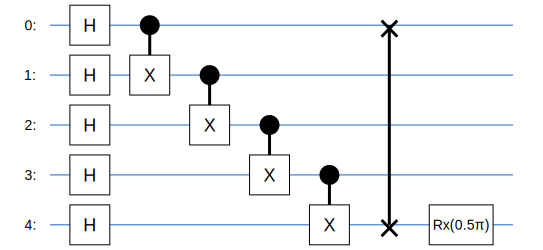

In [13]:
SVGCircuit(circuit)

### 2. A circuit that is a series of small cirq.Rx rotations, with probability plot of measuring the state in |0⟩

In [15]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

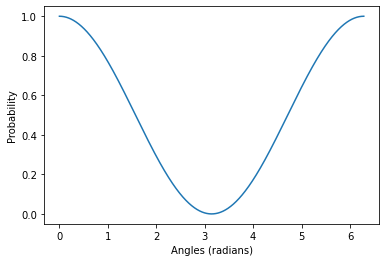

In [25]:
angles = np.linspace(0, 2*pi, 7200)
prob = []
for i in angles:
    c = cirq.Circuit()
    q = cirq.LineQubit.range(1)
    s = cirq.Simulator()
    c.append(cirq.rx(i).on(q[0]))
    state = s.simulate(c)
    prob.append(abs(state.final_state_vector[0])**2)
    
plt.plot(angles, prob)
plt.xlabel('Angles (radians)')
plt.ylabel('Probability')
plt.show()